In [2]:
import sys, os
sys.path.append(os.path.abspath(os.path.join('..')))

In [3]:
import sympy 
from sympy import banded, ones, Matrix, symbols, sqrt, print_latex, oo
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import wofz 
import scipy

In [4]:
%matplotlib inline
import matplotlib
font = {'family' : 'serif',
        'size'   : 14}

matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 

## Asymmetrically Weighted Hermite Linear Closures

In [8]:
Nv = 5

In [9]:
xi= symbols('xi') 
k = symbols('k', integer = True)
c = symbols('c', complex = True)
b = symbols('b', complex = True)
a = symbols('a', complex = True)

In [10]:
vec = sympy.zeros(Nv)
for jj in range(1, Nv+1):
    vec[jj-1] = sympy.sqrt(jj)/ (sympy.sqrt(2))

In [11]:
vec[0, :]

Matrix([[sqrt(2)/2, 1, sqrt(6)/2, sqrt(2), sqrt(10)/2]])

In [12]:
A = banded({1: tuple(vec[0, :-1]), -1: tuple(vec[0, :-1])})

In [13]:
# A[-1, Nv-3] += sympy.I * a * sympy.sqrt(Nv)/ sympy.sqrt(2)  * k / np.abs(k)
# A[-1, Nv-2] += sympy.I * b * sympy.sqrt(Nv)/ sympy.sqrt(2)  #* k / np.abs(k)
A[-1, Nv-1] += sympy.I * c * sympy.sqrt(Nv)/ sympy.sqrt(2) # * k / np.abs(k)

In [14]:
A

Matrix([
[        0, sqrt(2)/2,         0,         0,              0],
[sqrt(2)/2,         0,         1,         0,              0],
[        0,         1,         0, sqrt(6)/2,              0],
[        0,         0, sqrt(6)/2,         0,        sqrt(2)],
[        0,         0,         0,   sqrt(2), sqrt(10)*I*c/2]])

In [15]:
I = np.eye(Nv, dtype=int)

In [16]:
M = sympy.Matrix(I*xi - k/np.abs(k)*A)

In [17]:
R_approx = sympy.simplify(sympy.simplify(M.inv()[0, 1]/sympy.sqrt(2) * k/np.abs(k)))

In [18]:
R_approx

(2*sqrt(10)*c*xi**2*Abs(k) - 3*sqrt(10)*c*Abs(k) + 4*I*k*xi**3 - 14*I*k*xi)/(4*sqrt(10)*c*xi**4*Abs(k) - 12*sqrt(10)*c*xi**2*Abs(k) + 3*sqrt(10)*c*Abs(k) + 8*I*k*xi**5 - 40*I*k*xi**3 + 30*I*k*xi)

In [19]:
print_latex(R_approx)

\frac{2 \sqrt{10} c \xi^{2} \left|{k}\right| - 3 \sqrt{10} c \left|{k}\right| + 4 i k \xi^{3} - 14 i k \xi}{4 \sqrt{10} c \xi^{4} \left|{k}\right| - 12 \sqrt{10} c \xi^{2} \left|{k}\right| + 3 \sqrt{10} c \left|{k}\right| + 8 i k \xi^{5} - 40 i k \xi^{3} + 30 i k \xi}


## Asymptotic Expansion

### Adiabatic limit $\xi \to 0$

In [20]:
asymptotics_0 = R_approx.series(xi, 0, 3)

In [21]:
asymptotics_0

-Abs(k)/k + xi*(-7*sqrt(10)*I/(15*c) + sqrt(10)*I*Abs(k)/(c*k)) + xi**2*(-(4 - 10/c**2)*Abs(k)/k + 2*Abs(k)/(3*k) - 14/(3*c**2)) + O(xi**3)

In [22]:
print_latex(asymptotics_0)

- \frac{\left|{k}\right|}{k} + \xi \left(- \frac{7 \sqrt{10} i}{15 c} + \frac{\sqrt{10} i \left|{k}\right|}{c k}\right) + \xi^{2} \left(- \frac{\left(4 - \frac{10}{c^{2}}\right) \left|{k}\right|}{k} + \frac{2 \left|{k}\right|}{3 k} - \frac{14}{3 c^{2}}\right) + O\left(\xi^{3}\right)


In [23]:
asymptotics_0.coeff(xi, 2)

-(4 - 10/c**2)*Abs(k)/k + 2*Abs(k)/(3*k) - 14/(3*c**2)

In [24]:
sol_coeff = sympy.solve(asymptotics_0.coeff(xi, 1) + sympy.I*sympy.sqrt(sympy.pi), c)

In [29]:
sympy.expand(sol_coeff[0])

7*sqrt(10)/(15*sqrt(pi)) - sqrt(10)*Abs(k)/(sqrt(pi)*k)

### Fluid (cold plasma) limit $\xi \to \infty$

In [30]:
asymptotics_inf = R_approx.series(xi, oo, 6)

In [31]:
asymptotics_inf

(-5*sqrt(10)*I*c**3/8 + 7*sqrt(10)*I*c/8 - sqrt(10)*I*c*(5 - 5*c**2/2)*Abs(k)/(4*k) + 3*sqrt(10)*I*c*Abs(k)/(8*k))/xi**5 + (-5*c**2/4 + 5*c**2*Abs(k)/(4*k) + 3/4)/xi**4 + (sqrt(10)*I*c/4 - sqrt(10)*I*c*Abs(k)/(4*k))/xi**3 + 1/(2*xi**2) + O(xi**(-6), (xi, oo))

In [32]:
print_latex(asymptotics_inf)

\frac{- \frac{5 \sqrt{10} i c^{3}}{8} + \frac{7 \sqrt{10} i c}{8} - \frac{\sqrt{10} i c \left(5 - \frac{5 c^{2}}{2}\right) \left|{k}\right|}{4 k} + \frac{3 \sqrt{10} i c \left|{k}\right|}{8 k}}{\xi^{5}} + \frac{- \frac{5 c^{2}}{4} + \frac{5 c^{2} \left|{k}\right|}{4 k} + \frac{3}{4}}{\xi^{4}} + \frac{\frac{\sqrt{10} i c}{4} - \frac{\sqrt{10} i c \left|{k}\right|}{4 k}}{\xi^{3}} + \frac{1}{2 \xi^{2}} + O\left(\frac{1}{\xi^{6}}; \xi\rightarrow \infty\right)


## Comparison with Hammett-Perkins 1990's approximation

In [33]:
def Z_fun(z):
    return 1j*np.sqrt(np.pi)*wofz(z)

def R(zeta):
    return -(1 + zeta*Z_fun(zeta))

def R_HP3_hermite(zeta):
    c = -np.sqrt(2)*2/np.sqrt(3*np.pi)
    return (np.sqrt(6)*c + 1j*zeta)/(2*np.sqrt(6)*c*(zeta**2) - np.sqrt(6)*c + 2j*(zeta**3) - 3j*zeta)

def R_HP4_hermite(zeta):
    c = -3*np.sqrt(np.pi)/(4*np.sqrt(2))
    return (2*np.sqrt(2)*c*zeta + 2j*(zeta**2) - 3j)/(4*np.sqrt(2)*c*(zeta**3) - 6*np.sqrt(2)*c*zeta + 4j*(zeta**4) - 12j*(zeta**2) + 3j)

def R_HP5_hermite(xi):
    c = -8 * np.sqrt(10)/ (15*np.sqrt(np.pi))
    return (2*np.sqrt(10)*c*(xi**2) - 3*np.sqrt(10)*c + 4j*(xi**3) - 14j*xi)/(4*np.sqrt(10)*c*(xi**4) - 12*np.sqrt(10)*c*(xi**2) + 3*np.sqrt(10)*c + 8j*(xi**5) - 40j*(xi**3) + 30j*xi)

def RHP3(xi):
    return -(-1j*xi + (2/np.sqrt(np.pi)))/((2/(np.sqrt(np.pi))) - 3j*xi - 4/(np.sqrt(np.pi)) * (xi**2) + 2j*(xi**3))

def RHP4(xi):
    return (-4 + 2j*np.sqrt(np.pi)*xi + (3*np.pi -8)*(xi**2))/(4 - 6j*np.sqrt(np.pi)*xi - (9*np.pi - 16)*(xi**2) + 4j*np.sqrt(np.pi)*(xi**3) + 2*(3*np.pi - 8)*(xi**4))

In [34]:
zeta = 10**np.linspace(-2, 3, 200)

In [35]:
R_HP3_like = R_HP3_hermite(zeta)
R_HP4_like = R_HP4_hermite(zeta)
R_HP5_like = R_HP5_hermite(zeta)
R_true = R(zeta)

In [36]:
R_HP3 = RHP3(zeta)
R_HP4 = RHP4(zeta)

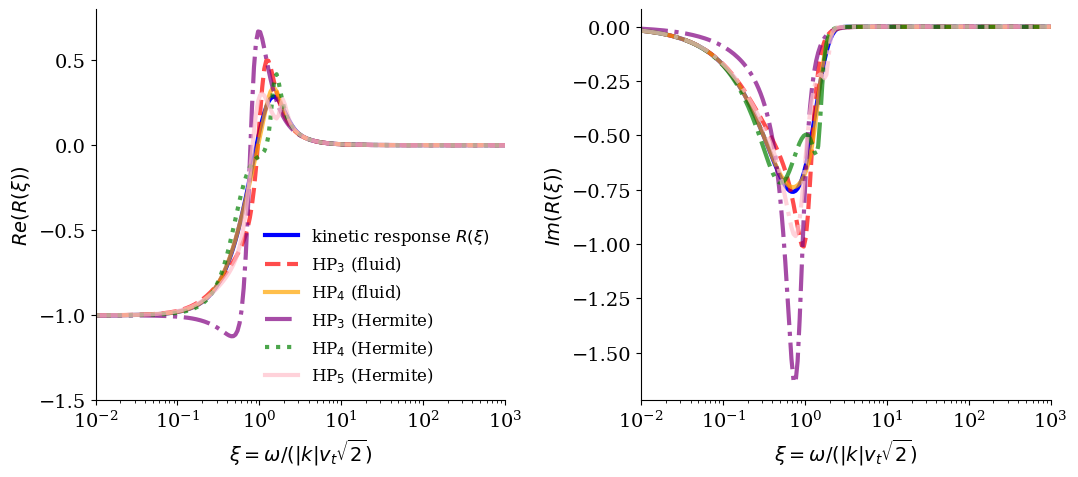

In [37]:
fig, ax = plt.subplots(ncols=2, figsize=(11, 5))

ax[0].plot(zeta, np.real(R_true), label=r"kinetic response $R(\xi)$", c="blue", linewidth=3)

ax[0].plot(zeta, np.real(R_HP3), "--", label=r"HP$_{3}$ (fluid)", c="red", linewidth=3, alpha=0.7)
ax[0].plot(zeta, np.real(R_HP4), "-", label=r"HP$_{4}$ (fluid)", c="orange", linewidth=3, alpha=0.7)
ax[0].plot(zeta, np.real(R_HP3_like), label=r"HP$_{3}$ (Hermite)", c="purple", ls="-.", linewidth=3, alpha=0.7)
ax[0].plot(zeta, np.real(R_HP4_like), label=r"HP$_{4}$ (Hermite)", c="green", ls=":", linewidth=3, alpha=0.7)
ax[0].plot(zeta, np.real(R_HP5_like), label=r"HP$_{5}$ (Hermite)", c="pink", ls="-", linewidth=3, alpha=0.7)

ax[1].plot(zeta, np.imag(R_true), c="blue", linewidth=3)
ax[1].plot(zeta, np.imag(R_HP3), "--", c="red", linewidth=3, alpha=0.7)
ax[1].plot(zeta, np.imag(R_HP4), "-",  c="orange", linewidth=3, alpha=0.7)
ax[1].plot(zeta, np.imag(R_HP3_like), ls="-.", c="purple", linewidth=3, alpha=0.7)
ax[1].plot(zeta, np.imag(R_HP4_like), ls="-.", c="green", linewidth=3, alpha=0.7)
ax[1].plot(zeta, np.imag(R_HP5_like), ls="-.", c="pink", linewidth=3, alpha=0.7)

ax[0].set_ylim(-1.5, 0.8)
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[0].set_ylabel(r"$Re(R(\xi))$")
ax[1].set_ylabel(r"$Im(R(\xi))$")
ax[0].set_xlabel(r"$\xi = \omega/(|k|v_{t} \sqrt{2})$")
ax[1].set_xlabel(r"$\xi = \omega/(|k|v_{t} \sqrt{2})$")
ax[0].set_xscale("log")
ax[1].set_xscale("log")
ax[0].set_xlim(1e-2, 1e3)
ax[1].set_xlim(1e-2, 1e3)
legend = ax[0].legend(ncols=1, fancybox=False, shadow=False, fontsize=12, loc='lower right')
legend.get_frame().set_alpha(0)
plt.tight_layout()
#plt.savefig("../figs/symbolic_response_function_SPS_HPlike.png", dpi=600)

# Landau Damping Dispersion Relation

In [38]:
def disp_k(omega, k=1):
    return k**2 - R(zeta=omega/(np.sqrt(2)*k))

def disp_hp3(omega, k=1, nu=1):
    return k**2 - RHP3(xi=omega/(k*np.sqrt(2)))

def disp_hp4(omega, k=1, nu=1):
    return k**2 - RHP4(xi=omega/(k*np.sqrt(2)))

def disp_R6(omega, k=1, nu=1):
    return k**2 -  R6(zeta=omega/(k*np.sqrt(2)), col=nu)

In [39]:
res_true = scipy.optimize.newton(disp_k, 1.41-0.81j, maxiter=100)

In [40]:
res_hp3 = scipy.optimize.newton(disp_hp3, 2-0.61j, maxiter=100)

In [41]:
res_hp4 = scipy.optimize.newton(disp_hp4, 2-0.61j, maxiter=100)

NameError: name 'R6' is not defined

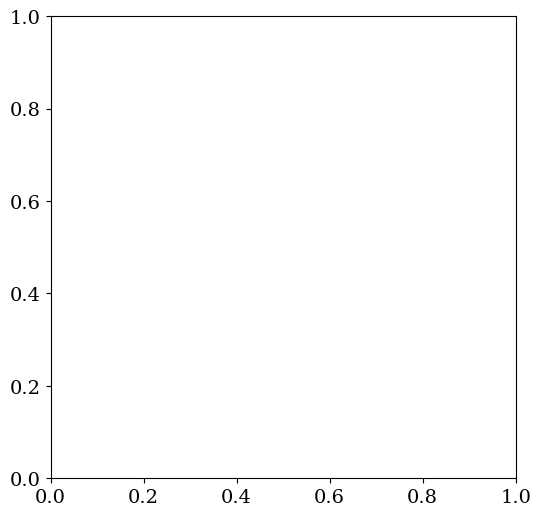

In [42]:
fig, ax = plt.subplots(figsize=(6, 6))
for nu_ in range(-20, 0):
    omega_r = np.linspace(0, 3, int(1e3))
    omega_i = np.linspace(-1, 0, int(1e3))
    X, Y = np.meshgrid(omega_r, omega_i)
    Z = disp_R6(X+1j*Y, nu=nu_)
    index = np.unravel_index(np.nanargmin(np.abs(Z)), Z.shape)
    if np.nanmin(np.abs(Z)) < 1E-2:
        ax.scatter(nu_, np.abs(Y[index].real-res_true.imag), c="blue")

ax.axhline(np.abs(res_hp3.imag-res_true.imag), label="Hammett-Perkins$_{3}$", c="red", linewidth=3)
ax.axhline(np.abs(res_hp4.imag-res_true.imag), label="Hammett-Perkins$_{4}$", c="green", ls="--", linewidth=3)
ax.set_xlabel(r"artificial collisions frequency $\nu$")
ax.set_ylabel(r"damping rate $\gamma$ absolute error w/ $k=1$")

legend = ax.legend(ncols=1, fancybox=False, shadow=False, fontsize=12, loc='upper right')
legend.get_frame().set_alpha(0)
plt.grid()

plt.tight_layout()